# Movie Conversations - Sentiment Analysis

## Read Datasets

In [27]:
import pandas as pd

# Re-read the datasets with cleaning
column_names = ['line_id', 'characterID', 'movieID', 'characterName', 'text']
movie_lines = pd.read_csv('data/movie_lines.tsv', sep='\t', encoding='utf-8', header=None, names=column_names, on_bad_lines='skip')
movie_lines['text'] = movie_lines['text'].fillna('').astype(str)
movie_lines['line_id'] = movie_lines['line_id'].astype(str).str.strip()
movie_lines['movieID'] = movie_lines['movieID'].astype(str).str.strip()

conv_columns = ['character1ID', 'character2ID', 'movieID', 'lineIDs']
movie_conversations = pd.read_csv('data/movie_conversations.tsv', sep='\t', encoding='utf-8', header=None, names=conv_columns, on_bad_lines='skip')
movie_conversations['movieID'] = movie_conversations['movieID'].astype(str).str.strip()

In [29]:
# Updated function to parse lineIDs that are space separated within the brackets
def parse_line_ids(line_ids_str):
    # Remove outer brackets and any quotes, then split by whitespace.
    clean_str = line_ids_str.strip("[]").replace("'", "").replace('"', '')
    # Split by any whitespace.
    return clean_str.split()

In [31]:
# Add a debugging column to see parsed lineIDs
movie_conversations['parsed_lineIDs'] = movie_conversations['lineIDs'].apply(parse_line_ids)
print("Parsed lineIDs for first few rows in movie_conversations:")
print(movie_conversations[['lineIDs', 'parsed_lineIDs']].head())

Parsed lineIDs for first few rows in movie_conversations:
                         lineIDs            parsed_lineIDs
0  ['L194' 'L195' 'L196' 'L197']  [L194, L195, L196, L197]
1                ['L198' 'L199']              [L198, L199]
2  ['L200' 'L201' 'L202' 'L203']  [L200, L201, L202, L203]
3         ['L204' 'L205' 'L206']        [L204, L205, L206]
4                ['L207' 'L208']              [L207, L208]


In [33]:
# Create a lookup dictionary from movie_lines using cleaned keys
lines_lookup = {(row['movieID'], row['line_id']): row['text'] 
                 for _, row in movie_lines.iterrows()}

In [35]:
# Function to build conversation text from each row in movie_conversations.
def build_conversation(row):
    movie_id = row['movieID']
    line_ids = row['parsed_lineIDs']
    conversation_lines = []
    for lid in line_ids:
        text_line = lines_lookup.get((movie_id, lid), '')
        conversation_lines.append(text_line)
    return ' '.join(conversation_lines).strip()

In [37]:
# Build the conversation column
movie_conversations['conversation'] = movie_conversations.apply(build_conversation, axis=1)

# Display the first few rows with the conversation field
print("Movie conversations with conversation field:")
print(movie_conversations[['movieID', 'lineIDs', 'parsed_lineIDs', 'conversation']].head())
print("Done")

Movie conversations with conversation field:
  movieID                        lineIDs            parsed_lineIDs  \
0      m0  ['L194' 'L195' 'L196' 'L197']  [L194, L195, L196, L197]   
1      m0                ['L198' 'L199']              [L198, L199]   
2      m0  ['L200' 'L201' 'L202' 'L203']  [L200, L201, L202, L203]   
3      m0         ['L204' 'L205' 'L206']        [L204, L205, L206]   
4      m0                ['L207' 'L208']              [L207, L208]   

                                        conversation  
0  Can we make this quick?  Roxanne Korrine and A...  
1  You're asking me out.  That's so cute. What's ...  
2  No no it's my fault -- we didn't have a proper...  
3  Why? Unsolved mystery.  She used to be really ...  
4  Gosh if only we could find Kat a boyfriend... ...  
Done


In [41]:
from textblob import TextBlob

# Define a function to get sentiment polarity of a text
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except Exception as e:
        return None

# Apply the sentiment analysis to the 'text' column
movie_conversations['tb_sentiment'] = movie_conversations['conversation'].apply(get_sentiment)

# Display the first few rows with the new sentiment column
print(movie_conversations.head())

  character1ID character2ID movieID                        lineIDs  \
0           u0           u2      m0  ['L194' 'L195' 'L196' 'L197']   
1           u0           u2      m0                ['L198' 'L199']   
2           u0           u2      m0  ['L200' 'L201' 'L202' 'L203']   
3           u0           u2      m0         ['L204' 'L205' 'L206']   
4           u0           u2      m0                ['L207' 'L208']   

             parsed_lineIDs  \
0  [L194, L195, L196, L197]   
1              [L198, L199]   
2  [L200, L201, L202, L203]   
3        [L204, L205, L206]   
4              [L207, L208]   

                                        conversation  tb_sentiment  
0  Can we make this quick?  Roxanne Korrine and A...      0.372222  
1  You're asking me out.  That's so cute. What's ...      0.500000  
2  No no it's my fault -- we didn't have a proper...      0.150000  
3  Why? Unsolved mystery.  She used to be really ...      0.015238  
4  Gosh if only we could find Kat a boyfriend..

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

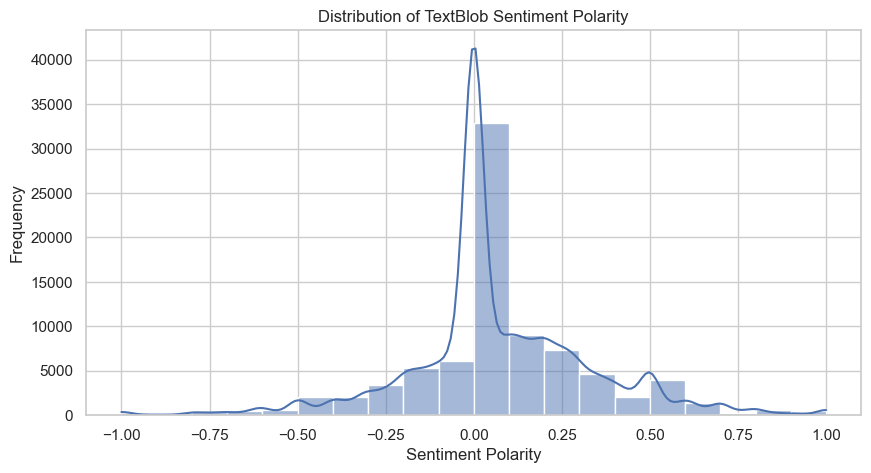

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(movie_conversations['tb_sentiment'], bins=20, kde=True)
plt.title('Distribution of TextBlob Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

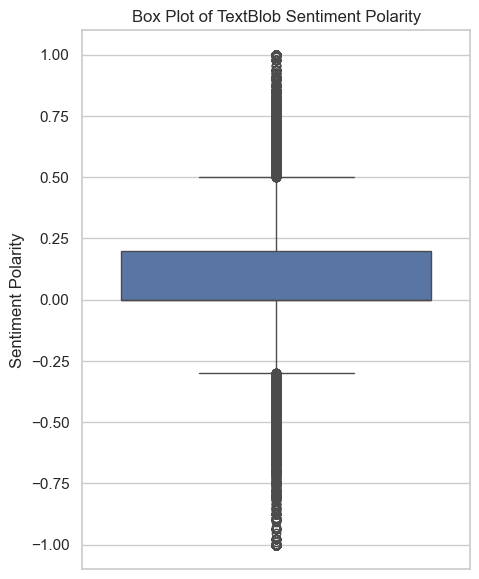

In [47]:
plt.figure(figsize=(5, 7))
sns.boxplot(y=movie_conversations['tb_sentiment'])
plt.title('Box Plot of TextBlob Sentiment Polarity')
plt.ylabel('Sentiment Polarity')
plt.show()

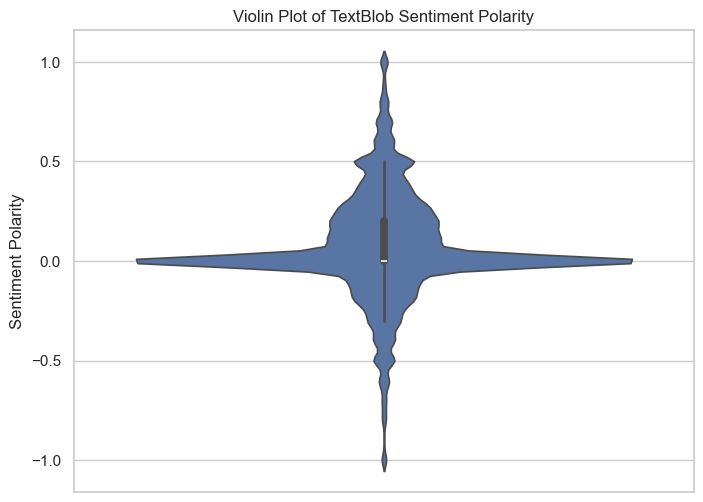

In [49]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=movie_conversations['tb_sentiment'])
plt.title('Violin Plot of TextBlob Sentiment Polarity')
plt.ylabel('Sentiment Polarity')
plt.show()

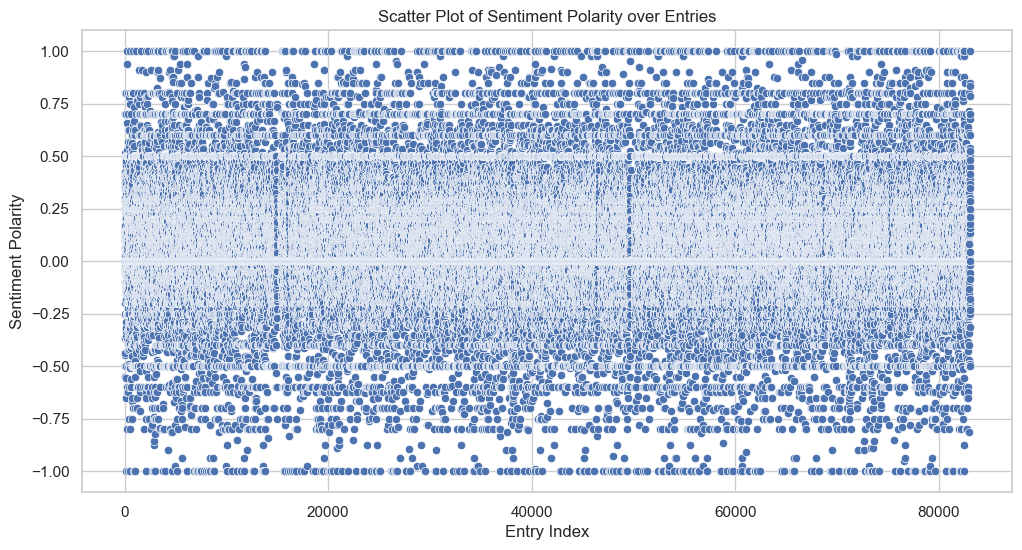

In [51]:
plt.figure(figsize=(12, 6))
movie_conversations = movie_conversations.reset_index()  # ensure a sequential index is available
sns.scatterplot(x='index', y='tb_sentiment', data=movie_conversations)
plt.title('Scatter Plot of Sentiment Polarity over Entries')
plt.xlabel('Entry Index')
plt.ylabel('Sentiment Polarity')
plt.show()